In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Datasets/"

 104asdu.csv			 data_ekstraksi_TA1normal.csv
 104asdu.pcap			 data_ekstraksi_TA1serangan.csv
 baru.csv			'iec104 (copy).csv'
 data_ekstraksi1.csv		 iec104.csv
 data_ekstraksi.csv		 iec104_fix.csv
 data_ekstraksi_filter.csv	 iec104_labelling.csv
 data_ekstraksi_gabung.csv	 iec104_labelling_modif.csv
 data_ekstraksi_gabungedit.csv	 model.h5
 data_ekstraksi_normal.csv	 model.json
 data_ekstraksi_serangan.csv


In [ ]:
#LIBRARY
import numpy as np
from numpy import where
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%tensorflow_version 1.x
#import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
#baca training dataset dari google drive
mitm = pd.read_csv("/content/drive/My Drive/Datasets/data_ekstraksi_gabungedit.csv")

In [ ]:
mitm

,frame,frame_len,time,src_ip,dst_ip,ttl,tot_len,ip_id,src_port,dst_port,win_size,apdu_len,type,type_id,causeTx,asdu_add,label
0,1,82,"Apr 10, 2018 19:32:21.536524000 WIB",10.50.50.150,10.50.50.105,64,68,35948,45244,2404,229,14,0,100,6,3,0
1,2,82,"Apr 10, 2018 19:32:21.536533000 WIB",10.50.50.150,10.50.50.103,64,68,33253,60416,2404,229,14,0,100,6,3,0
2,3,82,"Apr 10, 2018 19:32:21.536871000 WIB",10.50.50.150,10.50.50.101,64,68,28769,36482,2404,229,14,0,100,6,3,0
3,4,82,"Apr 10, 2018 19:32:21.537122000 WIB",10.50.50.150,10.50.50.102,64,68,62002,58674,2404,229,14,0,100,6,3,0
4,5,82,"Apr 10, 2018 19:32:21.537624000 WIB",10.50.50.150,10.50.50.104,64,68,52664,35398,2404,229,14,0,100,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35810,35811,88,"Apr 10, 2018 21:59:13.533108000 WIB",10.50.50.105,10.50.50.150,64,74,59657,2404,45244,453,20,0,103,7,3,0
35811,35812,82,"Apr 10, 2018 21:59:13.533206000 WIB",10.50.50.150,10.50.50.103,64,68,42001,60416,2404,229,14,0,100,6,3,0
35812,35813,82,"Apr 10, 2018 21:59:13.533211000 WIB",10.50.50.150,10.50.50.105,64,68,44735,45244,2404,229,14,0,100,6,3,0
35813,35814,100,"Apr 10, 2018 21:59:13.574424000 WIB",10.50.50.103,10.50.50.150,64,86,5808,2404,60416,453,16,0,11,20,3,0


In [ ]:
colm = ['frame','time','src_ip','dst_ip','src_port','dst_port']
mitm.drop(colm,axis=1,inplace=True)

In [ ]:
mitm

,frame_len,ttl,tot_len,ip_id,win_size,apdu_len,type,type_id,causeTx,asdu_add,label
0,82,64,68,35948,229,14,0,100,6,3,0
1,82,64,68,33253,229,14,0,100,6,3,0
2,82,64,68,28769,229,14,0,100,6,3,0
3,82,64,68,62002,229,14,0,100,6,3,0
4,82,64,68,52664,229,14,0,100,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...
35810,88,64,74,59657,453,20,0,103,7,3,0
35811,82,64,68,42001,229,14,0,100,6,3,0
35812,82,64,68,44735,229,14,0,100,6,3,0
35813,100,64,86,5808,453,16,0,11,20,3,0


In [ ]:
sc = StandardScaler()
mitm_scal = sc.fit_transform(mitm)
mitm_scal

array([[-1.09921986,  0.00528413, -1.09401257, ..., -0.55549827,
        -0.02046929, -0.18578918],
       [-1.09921986,  0.00528413, -1.09401257, ..., -0.55549827,
        -0.02046929, -0.18578918],
       [-1.09921986,  0.00528413, -1.09401257, ..., -0.55549827,
        -0.02046929, -0.18578918],
       ...,
       [-1.09921986,  0.00528413, -1.09401257, ..., -0.55549827,
        -0.02046929, -0.18578918],
       [ 1.83800168,  0.00528413,  1.83108897, ...,  1.17719631,
        -0.02046929, -0.18578918],
       [ 1.83800168,  0.00528413,  1.83108897, ...,  1.17719631,
        -0.02046929, -0.18578918]])

In [ ]:
mitm_sca = pd.DataFrame(data=mitm_scal,columns=["frame_len","ttl","tot_len","ip_id","win_size","apdu_len","type","type_id","causeTX","asdu_add","label"])
mitm_sca

,frame_len,ttl,tot_len,ip_id,win_size,apdu_len,type,type_id,causeTX,asdu_add,label
0,-1.099220,0.005284,-1.094013,0.012965,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
1,-1.099220,0.005284,-1.094013,-0.132944,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
2,-1.099220,0.005284,-1.094013,-0.375711,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
3,-1.099220,0.005284,-1.094013,1.423545,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
4,-1.099220,0.005284,-1.094013,0.917980,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
...,...,...,...,...,...,...,...,...,...,...,...
35810,-0.120146,0.005284,-0.118979,1.296585,-0.165989,0.977332,0.0,0.597971,-0.431734,-0.020469,-0.185789
35811,-1.099220,0.005284,-1.094013,0.340678,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
35812,-1.099220,0.005284,-1.094013,0.488699,-0.204476,-1.316703,0.0,0.521464,-0.555498,-0.020469,-0.185789
35813,1.838002,0.005284,1.831089,-1.618833,-0.165989,-0.552025,0.0,-1.748268,1.177196,-0.020469,-0.185789


In [ ]:
mitm.isnull().sum()

frame_len    0
ttl          0
tot_len      0
ip_id        0
win_size     0
apdu_len     0
type         0
type_id      0
causeTx      0
asdu_add     0
label        0
dtype: int64

In [ ]:
X = mitm.iloc[:, 0:10].values #nilai variabel x diambil dari kolom 0-3 (inputan)
y = mitm.iloc[:, 10].values #nilai variabel y diambil dari kolom ke 4 (output)

In [ ]:
#TRAINING AND TESTING Features
X_train , X_test , y_train , y_test = train_test_split (X,y,test_size = .7,random_state=12)

In [ ]:
print('Feature data shape : ', X_train.shape, y_train.shape)
print('Target data shape : ', X_test.shape, y_test.shape)

Feature data shape :  (10744, 10) (10744,)
Target data shape :  (25071, 10) (25071,)


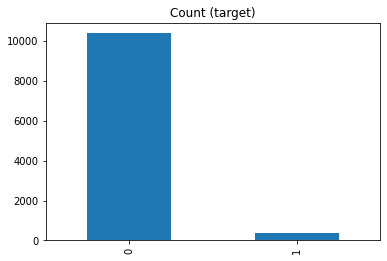

In [ ]:
c3 = pd.DataFrame(data=y_train,columns=["label"])
c3.label.value_counts().plot(kind='bar', title='Count (target)');

[(0, 10386), (1, 358)]


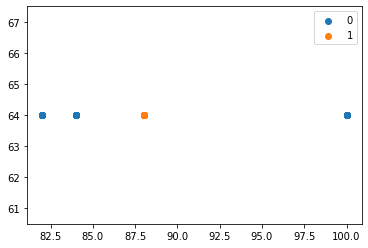

In [ ]:
from numpy import where
from matplotlib import pyplot
from collections import Counter
print(sorted(Counter(y_train).items()))

counter = Counter(y_train)

for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#X_test, y_test = sm.fit_sample(X_test, y_test)
#y_test = to_categorical(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


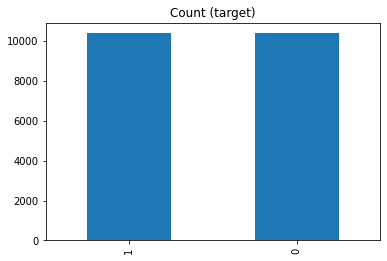

In [ ]:
c = pd.DataFrame(data=y_train_res,columns=["label"])
c.label.value_counts().plot(kind='bar', title='Count (target)');

[(0, 10386), (1, 10386)]


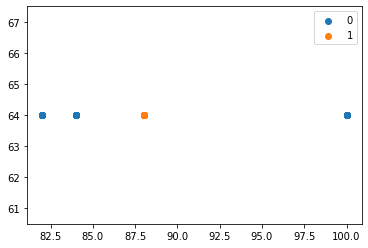

In [ ]:
from numpy import where
from matplotlib import pyplot
print(sorted(Counter(y_train_res).items()))

counter = Counter(y_train_res)

for label, _ in counter.items():
	row_ix = where(y_train_res == label)[0]
	pyplot.scatter(x_train_res[row_ix, 0], x_train_res[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
#smote testing
sm = SMOTE(random_state=12, ratio = 1.0)
x_test_res, y_test_res = sm.fit_sample(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#SCALER
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train_res)
X_test = sc.fit_transform(x_test_res)

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train_res)
y_test = to_categorical(y_test_res)

In [ ]:
X_train

array([[0.33333333, 0.        , 0.33333333, ..., 1.        , 0.02777778,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 1.        , 0.02777778,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
df = pd.DataFrame(data=X_train,columns=["frame_len","ttl","tot_len","ip_id","win_size","apdu_len","type","type_id","causeTX","asdu_add"])
df

,frame_len,ttl,tot_len,ip_id,win_size,apdu_len,type,type_id,causeTX,asdu_add
0,0.333333,0.0,0.333333,0.813374,0.006884,1.000000,0.0,1.0,0.027778,0.0
1,0.333333,0.0,0.333333,0.858375,0.006884,1.000000,0.0,1.0,0.027778,0.0
2,0.333333,0.0,0.333333,0.549197,0.000000,1.000000,0.0,1.0,0.000000,0.0
3,0.333333,0.0,0.333333,0.859046,0.006884,1.000000,0.0,1.0,0.027778,0.0
4,0.333333,0.0,0.333333,0.808048,0.006884,1.000000,0.0,1.0,0.027778,0.0
...,...,...,...,...,...,...,...,...,...,...
20767,0.333333,0.0,0.333333,0.495743,1.000000,0.333333,0.0,0.0,1.000000,0.0
20768,0.333333,0.0,0.333333,0.495743,1.000000,0.333333,0.0,0.0,1.000000,0.0
20769,0.333333,0.0,0.333333,0.495743,1.000000,0.333333,0.0,0.0,1.000000,0.0
20770,0.333333,0.0,0.333333,0.495743,1.000000,0.333333,0.0,0.0,1.000000,0.0


In [ ]:
X_test

array([[3.33333333e-01, 1.00000000e+00, 8.60465116e-01, ...,
        1.00000000e+00, 1.66666667e-01, 4.57770657e-05],
       [0.00000000e+00, 1.00000000e+00, 7.90697674e-01, ...,
        9.70873786e-01, 1.42857143e-01, 4.57770657e-05],
       [0.00000000e+00, 1.00000000e+00, 7.90697674e-01, ...,
        9.70873786e-01, 1.42857143e-01, 4.57770657e-05],
       ...,
       [3.33333333e-01, 1.00000000e+00, 8.60465116e-01, ...,
        1.06796117e-01, 1.00000000e+00, 4.57770657e-05],
       [3.33333333e-01, 1.00000000e+00, 8.60465116e-01, ...,
        1.06796117e-01, 1.00000000e+00, 4.57770657e-05],
       [3.33333333e-01, 1.00000000e+00, 8.60465116e-01, ...,
        1.06796117e-01, 1.00000000e+00, 4.57770657e-05]])

In [ ]:
df1 = pd.DataFrame(data=X_test,columns=["frame_len","ttl","tot_len","ip_id","win_size","apdu_len","type","type_id","causeTX","asdu_add"])
df1

,frame_len,ttl,tot_len,ip_id,win_size,apdu_len,type,type_id,causeTX,asdu_add
0,0.333333,1.0,0.860465,0.620081,0.013825,1.0,0.0,1.000000,0.166667,0.000046
1,0.000000,1.0,0.790698,0.809888,0.006989,0.7,0.0,0.970874,0.142857,0.000046
2,0.000000,1.0,0.790698,0.478492,0.006989,0.7,0.0,0.970874,0.142857,0.000046
3,0.333333,1.0,0.860465,0.033692,0.013825,1.0,0.0,1.000000,0.166667,0.000046
4,0.000000,1.0,0.790698,0.077592,0.006989,0.7,0.0,0.970874,0.142857,0.000046
...,...,...,...,...,...,...,...,...,...,...
48463,0.333333,1.0,0.860465,0.495720,1.000000,0.8,0.0,0.106796,1.000000,0.000046
48464,0.333333,1.0,0.860465,0.495720,1.000000,0.8,0.0,0.106796,1.000000,0.000046
48465,0.333333,1.0,0.860465,0.495720,1.000000,0.8,0.0,0.106796,1.000000,0.000046
48466,0.333333,1.0,0.860465,0.495720,1.000000,0.8,0.0,0.106796,1.000000,0.000046


In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 52        
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10,batch_size=128,)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20772 samples, validate on 48468 samples
Epoch 1/10
20772/20772 [==============================] - 1s 42us/step - loss: 0.4465 - acc: 0.8817 - val_loss: 0.3290 - val_acc: 0.9995
Epoch 2/10
20772/20772 [==============================] - 1s 26us/step - loss: 0.0347 - acc: 1.0000 - val_loss: 0.3331 - val_acc: 0.9994
Epoch 3/10
20772/20772 [==============================] - 1s 25us/step - loss: 0.0076 - acc: 1.0000 - val_loss: 0.3239 - val_acc: 0.9994
Epoch 4/10
20772/20772 [==============================] - 1s 25us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.3295 - val_acc: 0.9994
Epoch 5/10
20772/20772 [==============================] - 1s 25us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3364 - val_acc: 0.9994
Epoch 6/10
20772/20772 [==============================] - 1s 25us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3377 - val_acc: 0.9994
Epoch 7/10
20772/20772 [=========

In [ ]:
score = model.evaluate(X_train, y_train, batch_size=128)
print("\n%s: %.2f%%" % (model.metrics_names[0], score[0]))
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

20772/20772 [==============================] - 0s 5us/step

loss: 0.00%

acc: 100.00%


In [ ]:
predict_train = model.predict(X_train)
predict_train = predict_train > 0.5
predict_train

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

In [ ]:
print('Data Training : ', X_train.shape, y_train.shape)
print('Data Testing : ', X_test.shape, y_test.shape)

cm = confusion_matrix(y_train.argmax(axis=1),predict_train.argmax(axis=1))
print(classification_report(y_train,predict_train))

print("\nakurasi: %.0f%%" % (score[1]*100))

Data Training :  (20772, 10) (20772, 2)
Data Testing :  (48468, 10) (48468, 2)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10386
           1       1.00      1.00      1.00     10386

   micro avg       1.00      1.00      1.00     20772
   macro avg       1.00      1.00      1.00     20772
weighted avg       1.00      1.00      1.00     20772
 samples avg       1.00      1.00      1.00     20772


akurasi: 100%


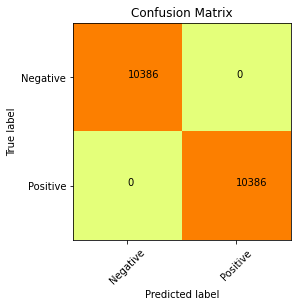

In [ ]:
#agar lebih mudah membaca confusion matrix bisa kita tampilkan dalam bentuk plot,
# keterangan dari plot, TN : True Negatif, FP: False positif, FN : False negatif, TP : true positif
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['',''], ['', '']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+""+str(cm[i][j]))
plt.show()

In [ ]:
P = cm[1][1] + cm[0][1]
N = cm[1][0] + cm[0][0]
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
TPR = TP/P
TNR = TN/N
FPR = FP/N
FNR = FN/P
Precision = TP / (TP + FP)
NoPrecision = TN / (TN + FN)

In [ ]:
print("---------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t\t\tEvaluation Measure")
print("---------------------------------------------------------------------------------------------------------------------------------")
print("|\tMetode\t|\tTPR\t|\tTNR\t|\tFPR\t|\tFNR\t|\tPrecision\t|\tNo-Precision\t|")
print("---------------------------------------------------------------------------------------------------------------------------------")
print("|\tJST\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t\t|\t%.4f%%\t\t|" % (TPR, TNR, FPR, FNR, Precision, NoPrecision))
print("---------------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------------
							Evaluation Measure
---------------------------------------------------------------------------------------------------------------------------------
|	Metode	|	TPR	|	TNR	|	FPR	|	FNR	|	Precision	|	No-Precision	|
---------------------------------------------------------------------------------------------------------------------------------
|	JST	|	1.0000%	|	1.0000%	|	0.0000%	|	0.0000%	|	1.0000%		|	1.0000%		|
---------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict_test = model.predict(X_test)
predict_test = predict_test > 0.5
predict_test
cm1 = confusion_matrix(y_test.argmax(axis=1),predict_test.argmax(axis=1))
print(classification_report(y_test,predict_test))

print("\nakurasi: %.0f%%" % (score[1]*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24234
           1       1.00      1.00      1.00     24234

   micro avg       1.00      1.00      1.00     48468
   macro avg       1.00      1.00      1.00     48468
weighted avg       1.00      1.00      1.00     48468
 samples avg       1.00      1.00      1.00     48468


akurasi: 100%


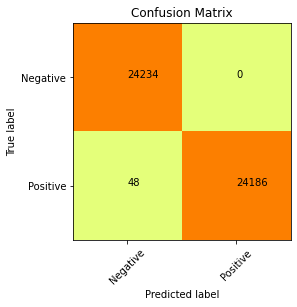

In [ ]:
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['',''], ['', '']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+""+str(cm1[i][j]))
plt.show()

In [ ]:
P1 = cm1[1][1] + cm1[0][1]
N1 = cm1[1][0] + cm1[0][0]
TP1 = cm1[1][1]
TN1 = cm1[0][0]
FP1 = cm1[0][1]
FN1 = cm1[1][0]

In [ ]:
TPR1 = TP1/P1
TNR1 = TN1/N1
FPR1 = FP1/ (FP1 + TN1)
FNR1 = FN1/ ( FN1 + TP1)
Precision1 = TP1 / (TP1 + FP1)
NoPrecision1 = TN1 / (TN1 + FN1)

In [ ]:
print("---------------------------------------------------------------------------------------------------------------------------------")
print("\t\t\t\t\t\t\tEvaluation Measure")
print("---------------------------------------------------------------------------------------------------------------------------------")
print("|\tMetode\t|\tTPR\t|\tTNR\t|\tFPR\t|\tFNR\t|\tPrecision\t|\tNo-Precision\t|")
print("---------------------------------------------------------------------------------------------------------------------------------")
print("|\tJST\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t|\t%.4f%%\t\t|\t%.4f%%\t\t|" % (TPR1, TNR1, FPR1, FNR1, Precision1, NoPrecision1))
print("---------------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------------
							Evaluation Measure
---------------------------------------------------------------------------------------------------------------------------------
|	Metode	|	TPR	|	TNR	|	FPR	|	FNR	|	Precision	|	No-Precision	|
---------------------------------------------------------------------------------------------------------------------------------
|	JST	|	1.0000%	|	0.9980%	|	0.0000%	|	0.0020%	|	1.0000%		|	0.9980%		|
---------------------------------------------------------------------------------------------------------------------------------


In [ ]:
akurasi1 = (TP1 + TN1)/ (TP1 + TN1 + FP1 + FN1)
akurasi1

0.9990096558554098